# LET'S Code KNN

![https://media.giphy.com/media/XyaQAnihoZBU3GmFPl/giphy.gif](https://media.giphy.com/media/XyaQAnihoZBU3GmFPl/giphy.gif)

In [110]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plotting things
from PIL import Image
import imutils
import cv2
import os

### Import Data To Code    

In [111]:
mainDIR = 'E:\\Universite\\8yy\\469\\Project\\dataset\\chest_xray\\'
print(os.listdir(mainDIR))

['test', 'train']


**Why we split our data set before doing anything? Answer is in final report.**

In [112]:
train_folder= mainDIR+'train\\'
test_folder = mainDIR+'test\\'

## Let's set up the training, testing folders

In [113]:
train_n = train_folder+'NORMAL\\'
train_p = train_folder+'PNEUMONIA\\'

test_n = test_folder+'NORMAL\\'
test_p = test_folder+'PNEUMONIA\\'

## Let's look at the our dataset

In [114]:
size_train_n=len(os.listdir(train_n))
size_train_p=len(os.listdir(train_p))
total_train = size_train_n+size_train_p

size_test_n=len(os.listdir(test_n))
size_test_p=len(os.listdir(test_p))
total_test=size_test_n+size_test_p

total_n = size_test_n+size_train_n
total_p = size_test_p+size_train_p

data = [[size_train_n,size_train_p,total_train],
        [size_test_n,size_test_p,total_test],
        [total_n,total_p,total_n+total_p]]
indexes = ["Train","Test","Total"]
pd.DataFrame(data,columns=["Normal Count","Pneumonia Count","Total"],index=indexes)

,Normal Count,Pneumonia Count,Total
Train,1349,3883,5232
Test,234,390,624
Total,1583,4273,5856


As you can see, we have total 5856 images those are high resolution. The train set is containing 90% of the dataset and the test set is 10% of the dataset.

## Let's look at some of the pictures

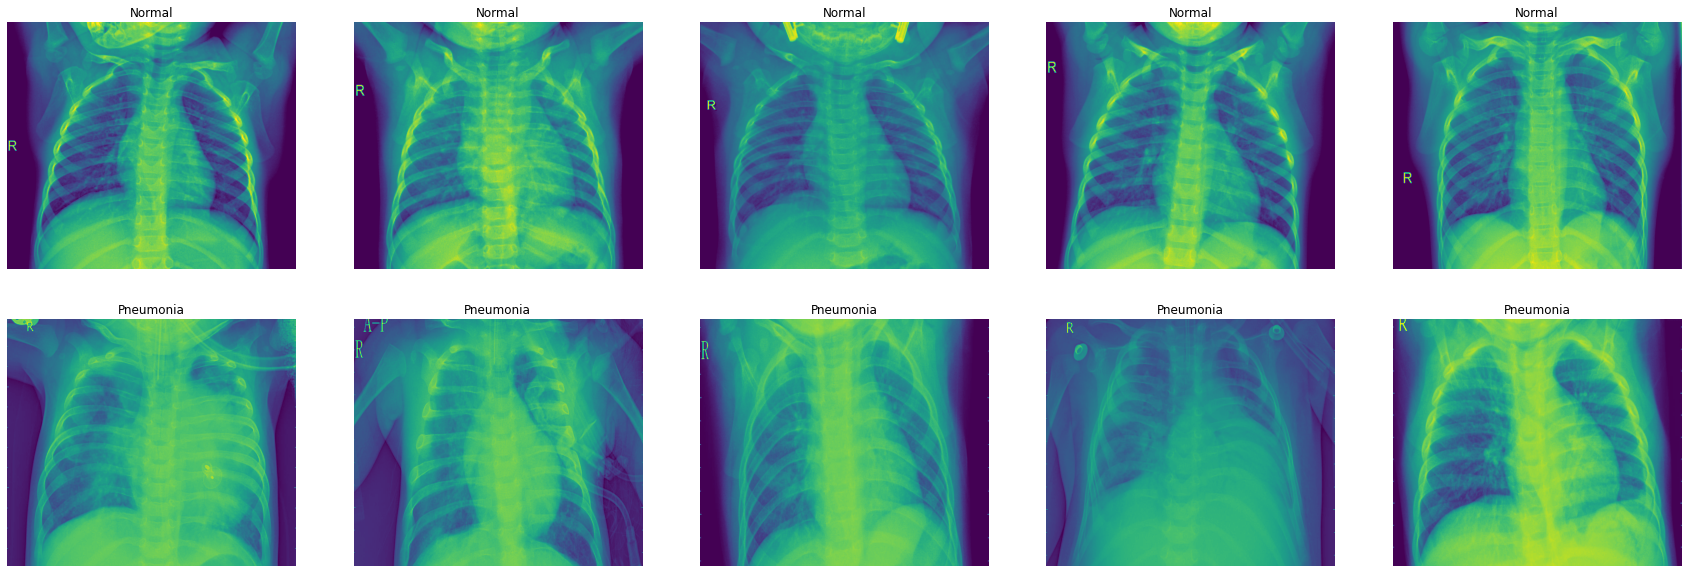

In [118]:
norm_pics = os.listdir(train_n)
sic_pics = os.listdir(train_p)

f,ax = plt.subplots(2,5,figsize=(30,10))
for i in range(5):
    tmp=np.random.randint(0,len(os.listdir(train_n)))
    img = Image.open(train_n+norm_pics[tmp])
    ax[0, i].imshow(img, cmap='viridis')
    ax[0, i].set_title("Normal")
    ax[0, i].axis('off')
    ax[0, i].set_aspect('auto')

for i in range(5):
    tmp=np.random.randint(0,len(os.listdir(train_p)))
    img = Image.open(train_p+sic_pics[tmp])
    ax[1, i].imshow(img, cmap='viridis')
    ax[1, i].set_title("Pneumonia")
    ax[1, i].axis('off')
    ax[1, i].set_aspect('auto')

plt.show()


In [119]:
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

### Preparing Dataset for Model

In [120]:
X_train, Y_train, X_test, Y_test = [],[],[],[]

In [121]:
def prepareimages(imageFolderPath):
    rawImages = []
    for imagePath in os.listdir(imageFolderPath):
        image = cv2.imread(imageFolderPath+imagePath)
        # extract raw pixel intensity "features", followed by a color
        pixels = image_to_feature_vector(image)
        rawImages.append(pixels)     
    return rawImages

**Train**

In [122]:
X_train = prepareimages(train_n)
Y_train = [0]*len(X_train)
X_train += prepareimages(train_p)
Y_train += [1]*(len(X_train)-len(Y_train))

1349


**Test**

In [124]:
X_test = prepareimages(test_n)
Y_test = [0]*len(X_test)
X_test += prepareimages(test_p)
Y_test += [1]*(len(X_test)-len(Y_test))

624


Change type of data: normal array to numpy array to help scikit-learn.

In [125]:
X_train, Y_train, X_test, Y_test = np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)

print("[INFO] pixels matrix: {:.2f}MB".format((X_train.nbytes / (1024 * 1000.0))+(X_test.nbytes / (1024 * 1000.0))))

[INFO] pixels matrix: 17.57MB


Put vectors to KNN space and apply test the model.

In [126]:
max_neigbors_count=20
accuracies=[]
for i in range(1,max_neigbors_count+1):
    model = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    model.fit(X_train,Y_train)
    accuracies.append(model.score(X_test, Y_test)*100)
    print("[INFO] "+str(i)+"-NN accuracy: {:.2f}%".format(accuracies[-1]))

[INFO] 1-NN accuracy: 75.48%
[INFO] 2-NN accuracy: 79.81%
[INFO] 3-NN accuracy: 74.52%
[INFO] 4-NN accuracy: 77.88%
[INFO] 5-NN accuracy: 74.36%
[INFO] 6-NN accuracy: 75.32%
[INFO] 7-NN accuracy: 73.72%
[INFO] 8-NN accuracy: 74.84%
[INFO] 9-NN accuracy: 73.72%
[INFO] 10-NN accuracy: 74.68%
[INFO] 11-NN accuracy: 73.24%
[INFO] 12-NN accuracy: 74.04%
[INFO] 13-NN accuracy: 73.40%
[INFO] 14-NN accuracy: 74.20%
[INFO] 15-NN accuracy: 72.60%
[INFO] 16-NN accuracy: 73.40%
[INFO] 17-NN accuracy: 72.76%
[INFO] 18-NN accuracy: 73.08%
[INFO] 19-NN accuracy: 72.76%
[INFO] 20-NN accuracy: 73.08%


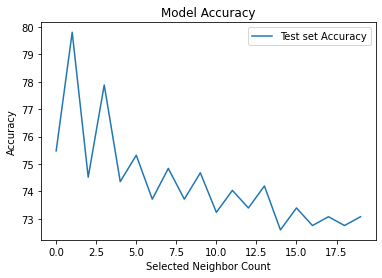

In [127]:
plt.plot(accuracies)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Selected Neighbor Count')
plt.legend(['Test set Accuracy'], loc='upper right')
plt.show()